## Week 2 In Class help

>Corrections to the weekly assignments can be completed for a regrade only within the 1 week following that assignments grading.  

>If an assignment is not turned in, the one week starts from the time of the due date.  That is, an assignment can at maximum be 1 week late but you lose the chance for a regrade.  

**Today's objectives**   
1. Be able to use google forms to create a survey, import this into python and statistically and graphically represent the data.  
2.  Review the use of the .py file for creating your own package of functions.  

#### Problem 2 week 1 - comments

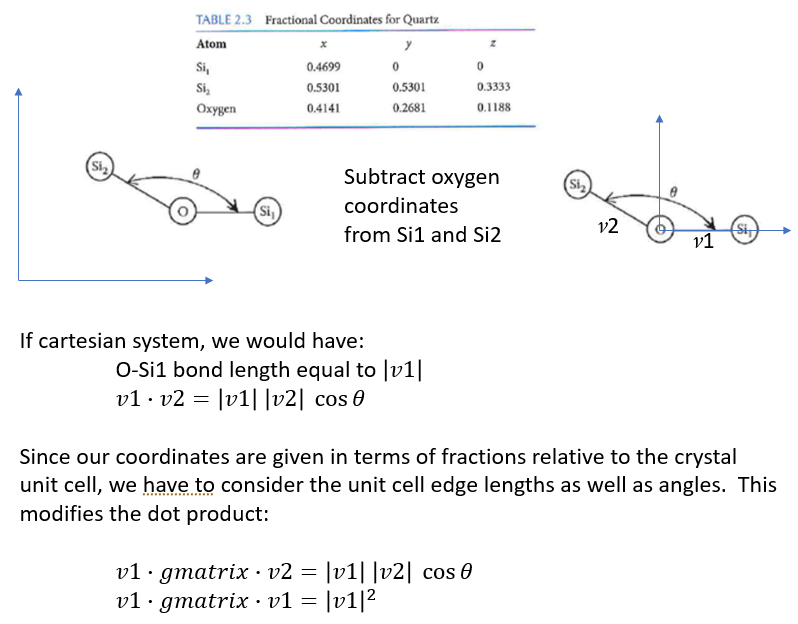

```magnitude_of_v1=np.sqrt(np.dot(v1,np.dot(g,v1)))```

v1 can be given as a 1D array e.g.  
``` np.array([1,2,3]) ``` in both positions  
  
g is a 2D array e.g. 
```np.array([[1,2,3],[4,5,6],[7,8,9]]```)

### week 1 use of *.py file for writing your own package of functions

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
raw=pd.read_excel('Al7075_out.xlsx')
raw.head(3)

,stress MPa,strain,"force, lbs","length, in"
0,0.0,0.00000,0.000000,2.00000
1,112.0,0.00165,3189.705354,2.00330
2,222.0,0.00322,6322.451684,2.00644


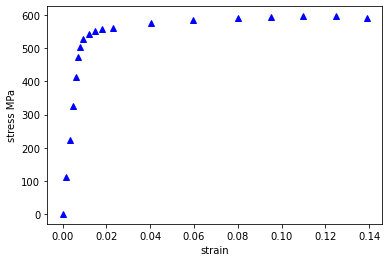

In [5]:
plt.plot(raw.iloc[:,1],raw.iloc[:,0],'^b')
plt.xlabel('strain')
plt.ylabel('stress MPa')
plt.show()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def ln(x):
    return(np.log(x))

def xyplt(filename, xcolumn_position, ycolumn_position, labelx, labely):
    raw=pd.read_excel(filename)
    plt.plot(raw.iloc[:,xcolumn_position],raw.iloc[:,ycolumn_position],'^b')
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.show()

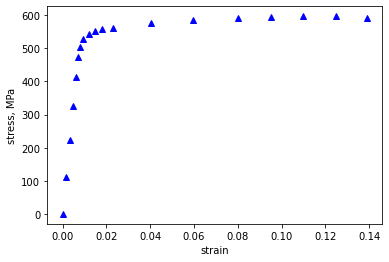

In [9]:
xyplt('Al7075_out.xlsx',1,0,'strain','stress, MPa')

copy into *.py text file and try it out in a new notebook...

### Week 2 assignment help: 

#### Your lesson file reviews the steps in creating a google poll and downloading the results.  Let's start from the downloaded data.  

In [10]:
import os  #we use this to join our file path to our filename
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [11]:
# I always separate the path from the filename
# in case I need the path for storing a new file, etc. 
path = r'C:\Users\Sean\Google Drive\Teaching\2114 & 3114 Math I & II\git_2114_3114\lessons_3114\Week 2 Lesson 2\data'
filename='MSE 3114 F21.csv'
fullpath=os.path.join(path,filename)

raw=pd.read_csv(fullpath)
raw.head()  #shows first 5 rows

,Timestamp,Total score,"If I have to choose between Pepsi and Coke, I prefer to drink Pepsi.","If I have to choose between Pepsi and Coke, I prefer to drink Pepsi. [Score]","If I have to choose between Pepsi and Coke, I prefer to drink Pepsi. [Feedback]","If I have to choose between Sweet Tea and Unsweet Tea, I prefer to drink Sweet Tea.","If I have to choose between Sweet Tea and Unsweet Tea, I prefer to drink Sweet Tea. [Score]","If I have to choose between Sweet Tea and Unsweet Tea, I prefer to drink Sweet Tea. [Feedback]","If I have to choose between Water and Vanilla flavored Almond Milk, I prefer to drink Water.","If I have to choose between Water and Vanilla flavored Almond Milk, I prefer to drink Water. [Score]","If I have to choose between Water and Vanilla flavored Almond Milk, I prefer to drink Water. [Feedback]"
0,2021/08/27 12:36:39 PM AST,0.00 / 0,Strongly Disagree,-- / 0,NaN,Agree,-- / 0,NaN,Strongly Agree,-- / 0,NaN
1,2021/08/27 12:37:00 PM AST,0.00 / 0,Neutral,-- / 0,NaN,Strongly Agree,-- / 0,NaN,Strongly Agree,-- / 0,NaN
2,2021/08/27 12:38:09 PM AST,0.00 / 0,Disagree,-- / 0,NaN,Disagree,-- / 0,NaN,Disagree,-- / 0,NaN
3,2021/08/27 12:39:34 PM AST,0.00 / 0,Strongly Disagree,-- / 0,NaN,Strongly Agree,-- / 0,NaN,Strongly Agree,-- / 0,NaN
4,2021/08/27 12:40:35 PM AST,0.00 / 0,Agree,-- / 0,NaN,Agree,-- / 0,NaN,Strongly Agree,-- / 0,NaN


In [34]:
data=raw.iloc[:,[2,5,8]]
display(data.head(5))
data.columns

,"If I have to choose between Pepsi and Coke, I prefer to drink Pepsi.","If I have to choose between Sweet Tea and Unsweet Tea, I prefer to drink Sweet Tea.","If I have to choose between Water and Vanilla flavored Almond Milk, I prefer to drink Water."
0,Strongly Disagree,Agree,Strongly Agree
1,Neutral,Strongly Agree,Strongly Agree
2,Disagree,Disagree,Disagree
3,Strongly Disagree,Strongly Agree,Strongly Agree
4,Agree,Agree,Strongly Agree


Index(['If I have to choose between Pepsi and Coke, I prefer to drink Pepsi. ',
       'If I have to choose between Sweet Tea and Unsweet Tea, I prefer to drink Sweet Tea. ',
       'If I have to choose between Water and Vanilla flavored Almond Milk, I prefer to drink Water. '],
      dtype='object')

In [35]:
#let's shorten our column names
#the column labels are given by data.columns  We can also use data.columns to rename them:
data.columns=['PepsiNotCoke', 'SweetTeaNotUnsweet', 'WaterNotAlmondMilk']
data.head(5)

,PepsiNotCoke,SweetTeaNotUnsweet,WaterNotAlmondMilk
0,Strongly Disagree,Agree,Strongly Agree
1,Neutral,Strongly Agree,Strongly Agree
2,Disagree,Disagree,Disagree
3,Strongly Disagree,Strongly Agree,Strongly Agree
4,Agree,Agree,Strongly Agree


In [36]:
# we need to replace the terms: "Strongly Agree = 4, Agree = 3, Neutral = 2, Disagree = 1, Strongly Disagree = 0"
# so let's make a dictionary of replacement rules and then use .replace()
data=data.replace({'Strongly Agree': 2, 'Agree': 1, 'Neutral': 0, 'Disagree': -1, 'Strongly Disagree': -2})
data.head(8)

,PepsiNotCoke,SweetTeaNotUnsweet,WaterNotAlmondMilk
0,-2,1,2
1,0,2,2
2,-1,-1,-1
3,-2,2,2
4,1,1,2
5,-2,2,-1
6,-1,2,2
7,-2,0,2


In [37]:
data.mean() #or we could use of mean() function

PepsiNotCoke         -0.625000
SweetTeaNotUnsweet    1.416667
WaterNotAlmondMilk    1.458333
dtype: float64

Let's try seeing what a histogram of our data looks like.  

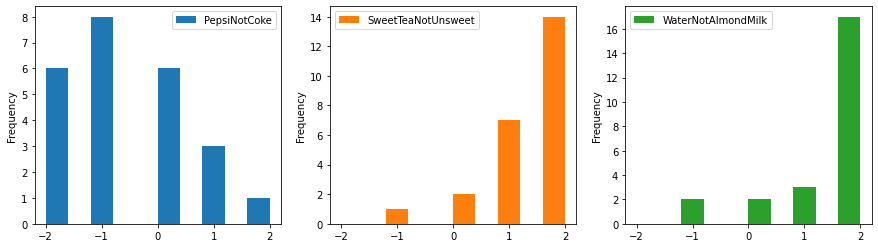

In [19]:
ax=data.plot.hist(subplots=True, legend=True, layout=(1, 3), figsize=(15,4))  #pandas plotting

Let's use a paired t-test to see if the mean values for our data are significantly different from one another. We will use the standard p-value of <= 0.05 to conclude that the means are significantly different. 

Here we test whether the preference to drink Pepsi over Coke is significantly different than the preference to drink Water over Almond Milk.  

In [20]:
data.loc[:,'PepsiNotCoke']

0    -2
1     0
2    -1
3    -2
4     1
5    -2
6    -1
7    -2
8     1
9    -2
10    0
11   -1
12   -2
13    0
14   -1
15    1
16   -1
17    0
18    0
19   -1
20    0
21   -1
22   -1
23    2
Name: PepsiNotCoke, dtype: int64

In [21]:
tttt,ppppp=stats.ttest_rel(data.loc[:,'PepsiNotCoke'], data.loc[:,'WaterNotAlmondMilk'])
print(tttt)
print(ppppp)

-7.229988054812213
2.3265784441680086e-07


Since our p value shown above (2.3e-7) is less than 0.05, we conclude that their is a significant difference in preference for drinking Pepsi over Coke as compared to drinking Water over Almond Milk.  In the example above, a mean of 2.0 would be no preference.  Based on the data the class has a preference for coke and a preference for water.  

In [22]:
t,p=stats.ttest_rel(data.loc[:,'SweetTeaNotUnsweet'], data.loc[:,'WaterNotAlmondMilk'])
print(t)
print(p)

-0.17052013832006116
0.8660922491049519


Since our p value above is greater than 0.05, we conclude that the mean of WaterNotAlmondMilk is not statistically different than the mean of SweetTeaNotUnsweet.  